In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
df = pd.read_csv('../Cases/human-resources-analytics/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [21]:
df.shape

(14995, 10)

In [3]:
dum_df = pd.get_dummies(df, drop_first=True)

In [4]:
X = dum_df.drop('left', axis=1)
y = dum_df['left']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

In [6]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=23)

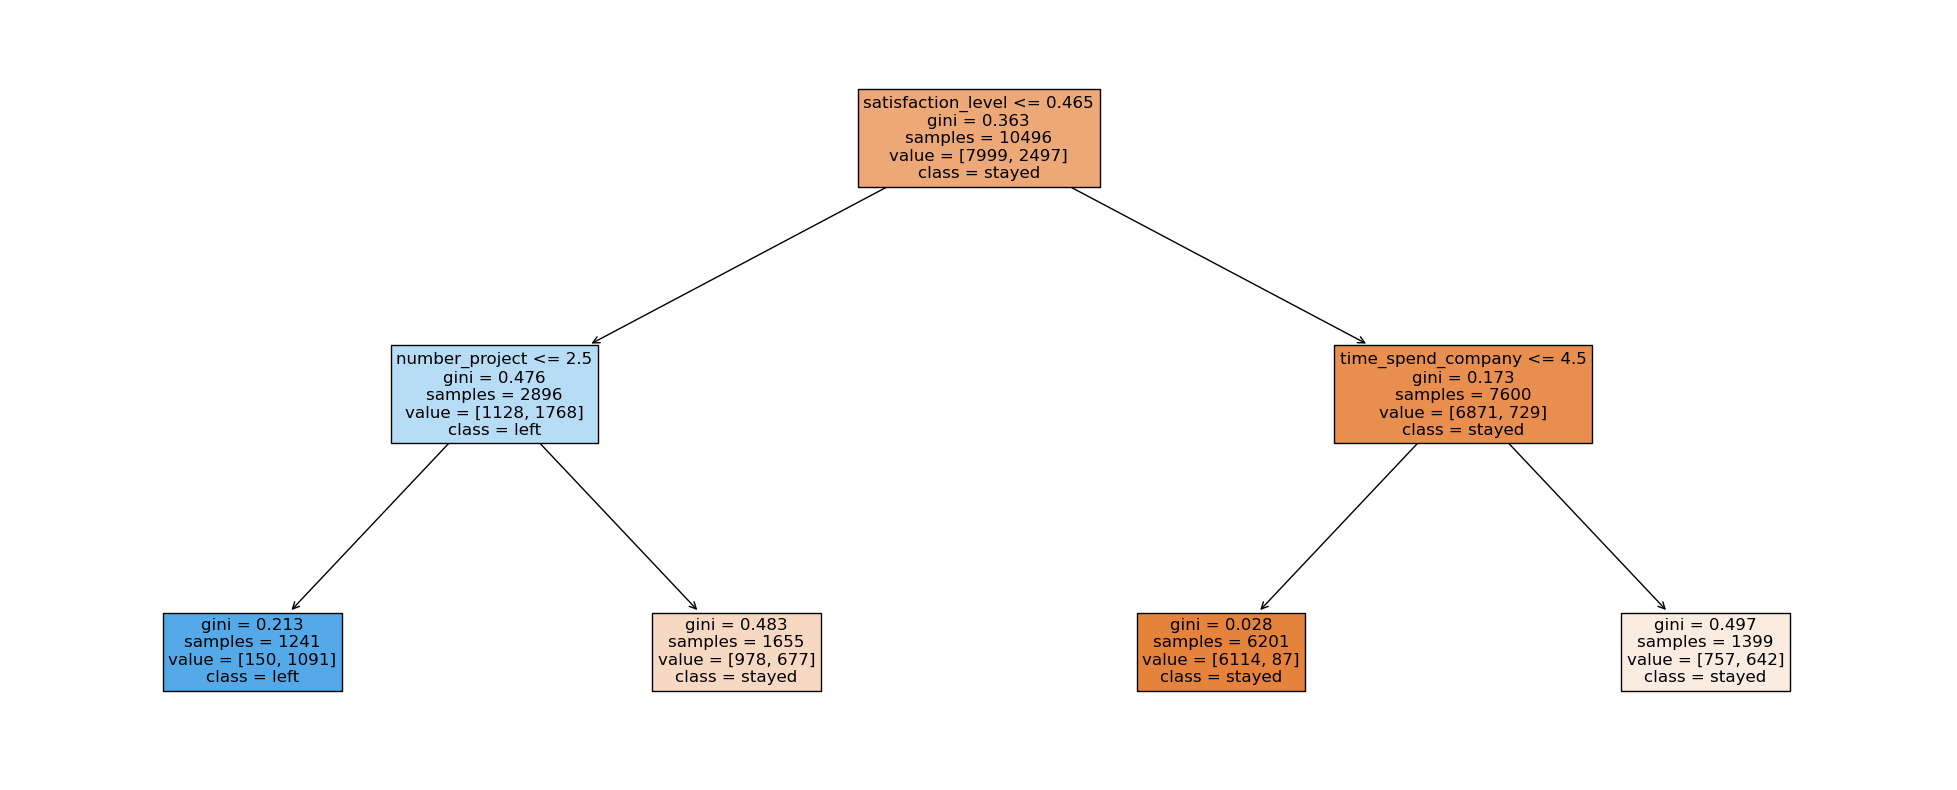

In [10]:
plt.figure(figsize=(25, 10))
plot_tree(dtc, feature_names=X_train.columns.to_list(), class_names=['stayed', 'left'], filled=True, fontsize=12)
plt.show()

In [12]:
y_pred = dtc.predict(X_test)
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(log_loss(y_test, y_pred_prob))

0.29562613083685063


In [22]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_depth': [2, 3, 4, 5, 6, None], 'min_samples_split': [5, 10, 15, 20]}
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=2, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='neg_log_loss')

In [23]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_split': 5}
-0.1122214750941013


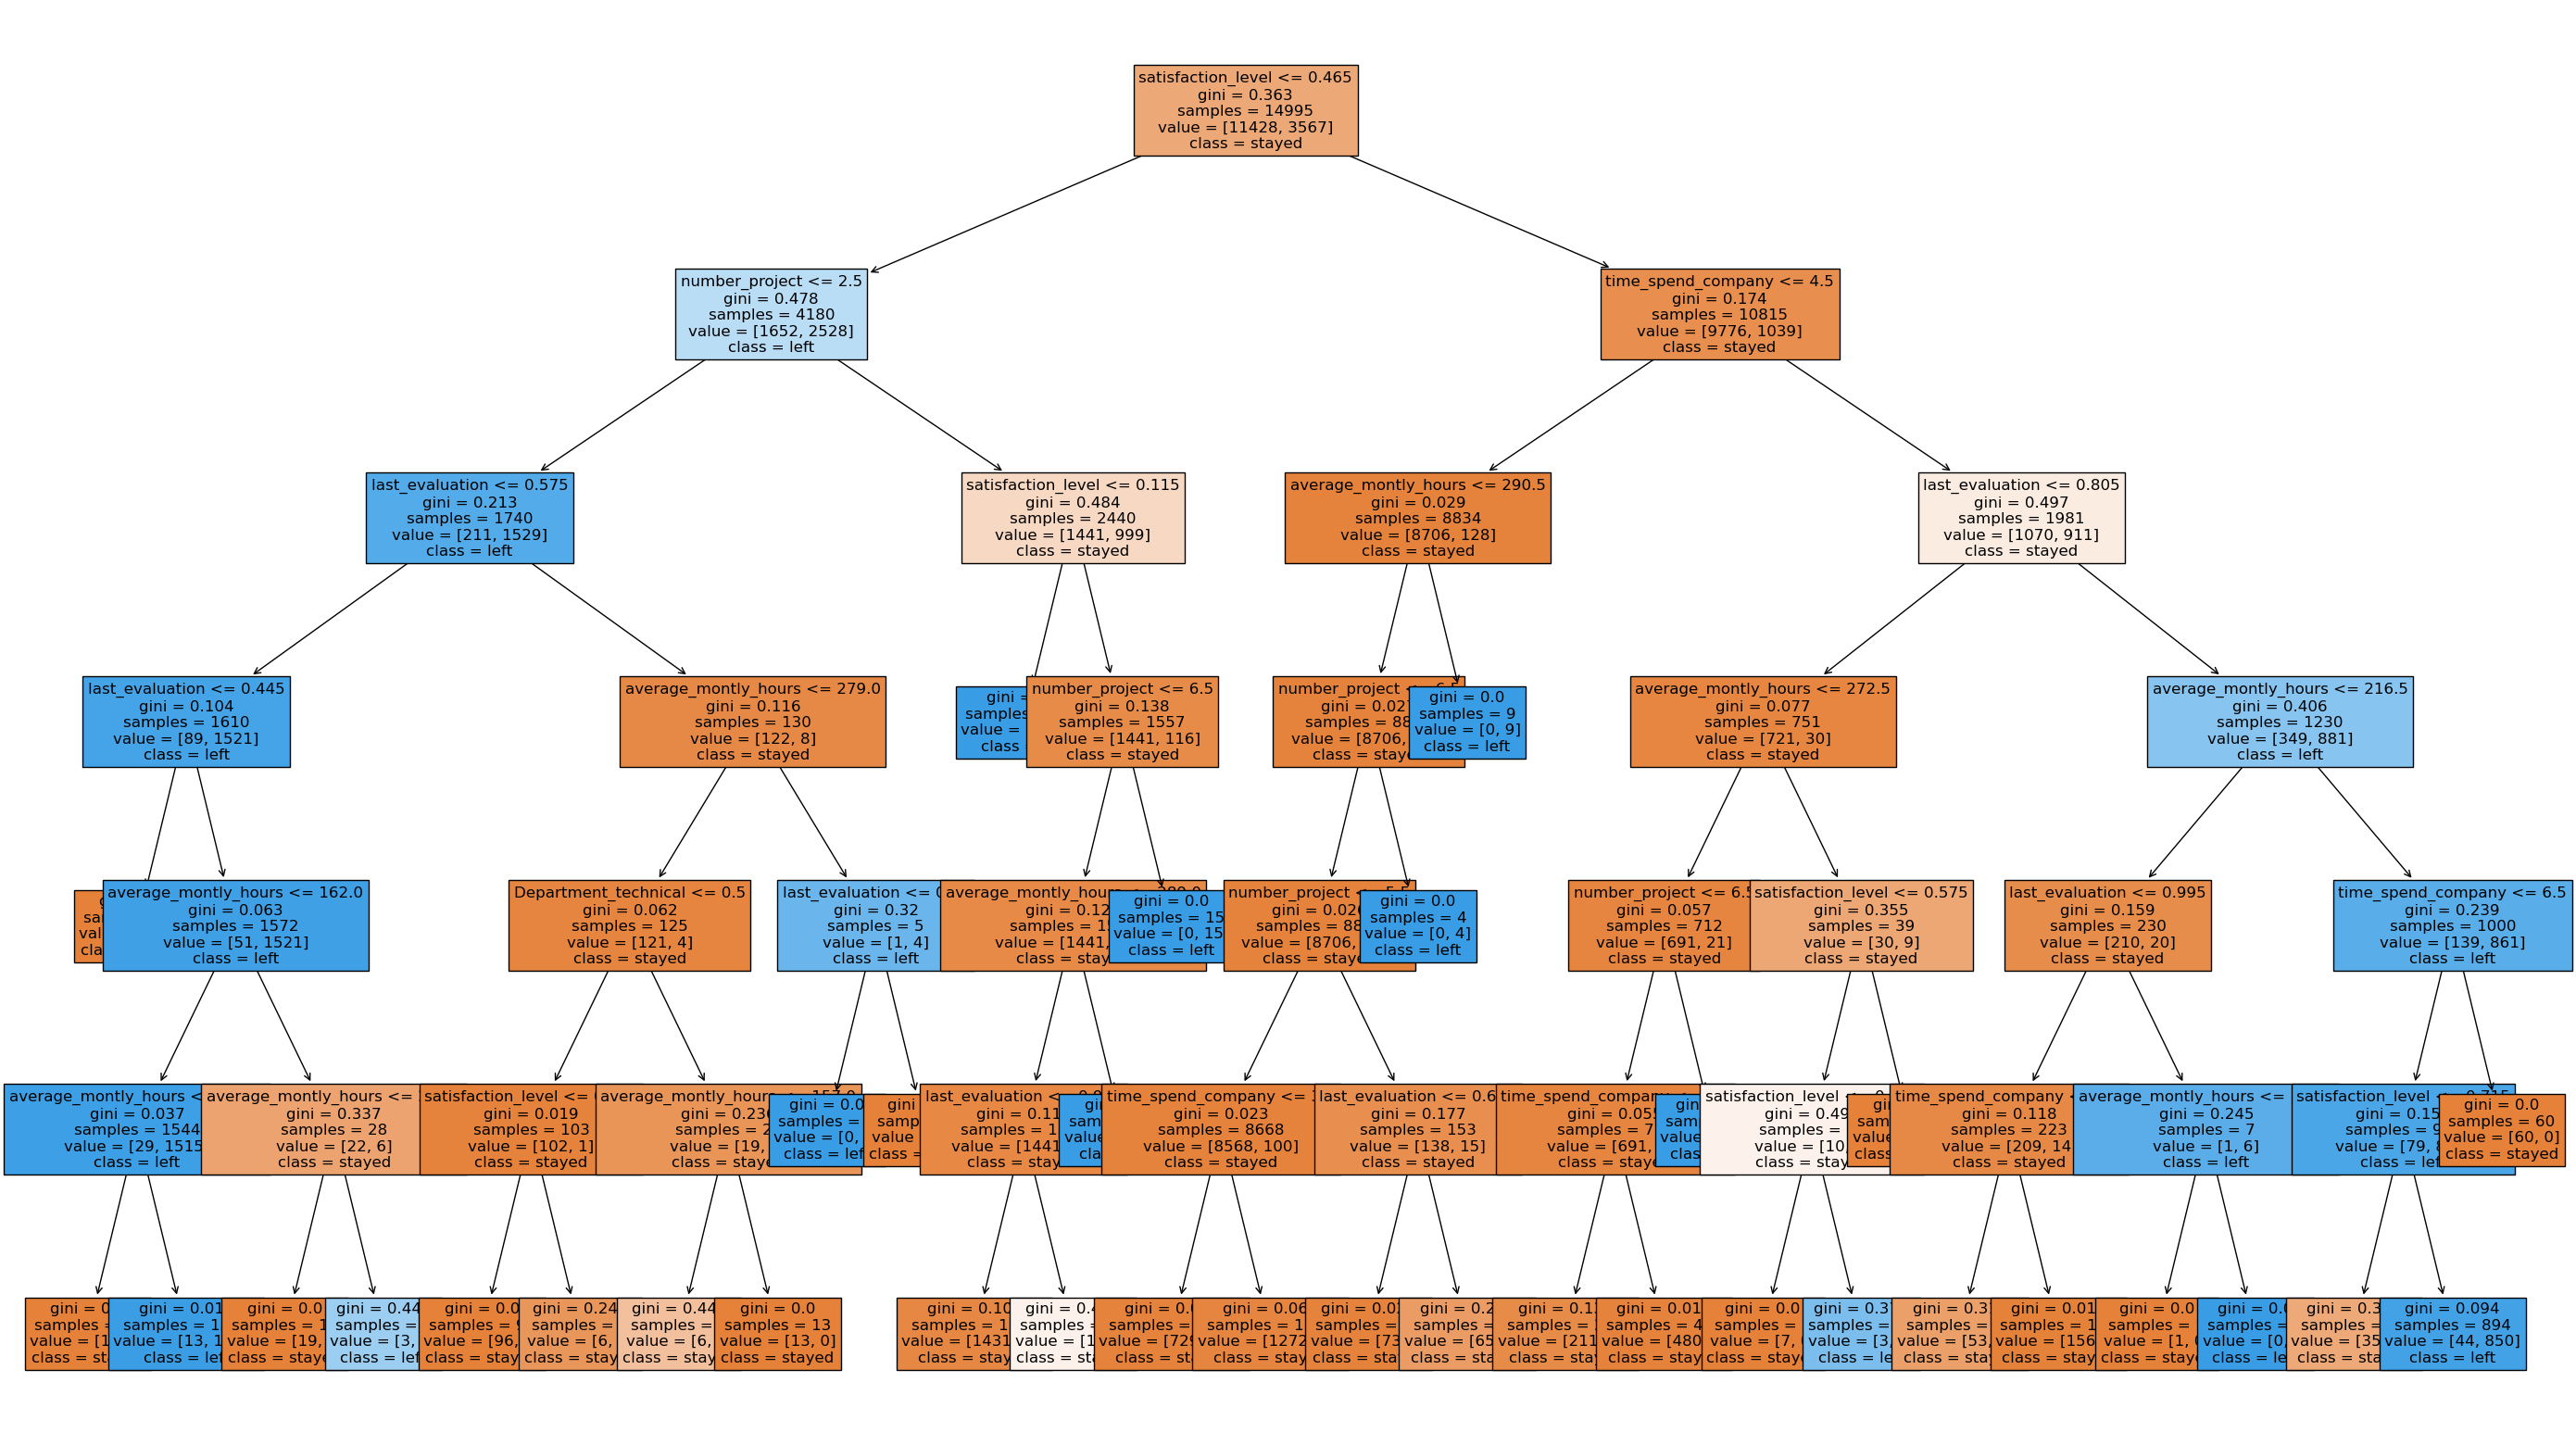

In [24]:
bm = gcv.best_estimator_

# Plotting the tree of the best model
plt.figure(figsize=(35, 20))
plot_tree(bm, feature_names=X_train.columns.to_list(), class_names=['stayed', 'left'], filled=True,
          fontsize=12)
plt.show()

In [26]:
y_pred_train = bm.predict(X_train)
y_pred_test = bm.predict(X_test)
print(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

0.9790396341463414 0.9784396532562791


### Feature Importance

In [33]:
df_imp = pd.DataFrame({'variable': bm.feature_names_in_,
                       'importance': bm.feature_importances_})
df_imp.sort_values(by='importance', ascending=False, inplace=True)

In [34]:
df_imp2 = df_imp[df_imp['importance'] > 0.01]
df_imp2

,variable,importance
0,satisfaction_level,0.531650
4,time_spend_company,0.153061
1,last_evaluation,0.144790
2,number_project,0.100018
3,average_montly_hours,0.070362


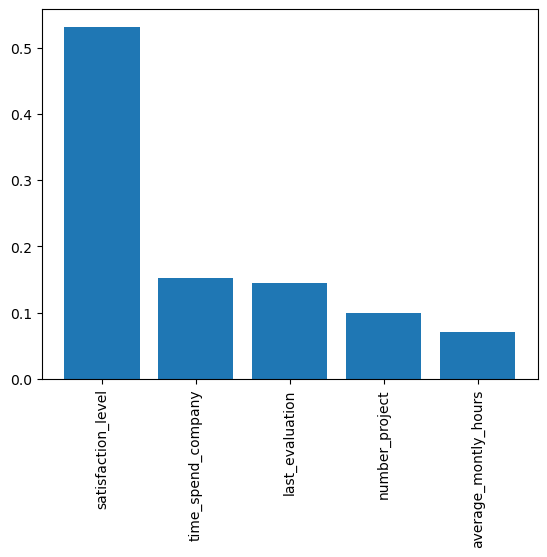

In [40]:
plt.bar(df_imp2['variable'].values, df_imp2['importance'].values)
plt.xticks(rotation=90)
plt.show()